In [58]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import joblib

In [59]:
training_file_path = r'D:\\sentiment analysis\\twitter_training.csv'
validation_file_path = r'D:\\sentiment analysis\\twitter_validation.csv'


In [60]:
train_df = pd.read_csv(training_file_path)
val_df = pd.read_csv(validation_file_path)

In [61]:
train_df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [62]:
train_df.tail()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...
74680,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [63]:
val_df.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [64]:
val_df.tail()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
998,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [65]:
train_df.shape

(74681, 4)

In [66]:
val_df.shape

(999, 4)

In [67]:
train_df.columns = ['id', 'subject', 'sentiment', 'text']
val_df.columns = ['id', 'subject', 'sentiment', 'text']

In [68]:
train_df.dtypes
val_df.dtypes

id            int64
subject      object
sentiment    object
text         object
dtype: object

In [69]:
df = pd.concat([train_df, val_df])

In [70]:
print(df.columns)

Index(['id', 'subject', 'sentiment', 'text'], dtype='object')


In [71]:
df.shape

(75680, 4)

In [72]:
df.describe

<bound method NDFrame.describe of        id              subject   sentiment  \
0    2401          Borderlands    Positive   
1    2401          Borderlands    Positive   
2    2401          Borderlands    Positive   
3    2401          Borderlands    Positive   
4    2401          Borderlands    Positive   
..    ...                  ...         ...   
994  4891  GrandTheftAuto(GTA)  Irrelevant   
995  4359                CS-GO  Irrelevant   
996  2652          Borderlands    Positive   
997  8069            Microsoft    Positive   
998  6960      johnson&johnson     Neutral   

                                                  text  
0    I am coming to the borders and I will kill you...  
1    im getting on borderlands and i will kill you ...  
2    im coming on borderlands and i will murder you...  
3    im getting on borderlands 2 and i will murder ...  
4    im getting into borderlands and i can murder y...  
..                                                 ...  
994  ⭐️ Toront

In [73]:
df.dtypes

id            int64
subject      object
sentiment    object
text         object
dtype: object

In [74]:
df['target'] = df['sentiment'].apply(lambda x: 1 if x == 'Positive' else (0 if x == 'Negative' else 2))

In [75]:
df.head()

,id,subject,sentiment,text,target
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,1
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,1
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,1
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,1
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,1


In [76]:
def clean_text(text):
    if not isinstance(text, str):
        text = ""
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters and numbers
    text = text.strip()  # Remove leading and trailing whitespace
    return text

In [77]:
df['cleaned_text'] = df['text'].apply(clean_text)

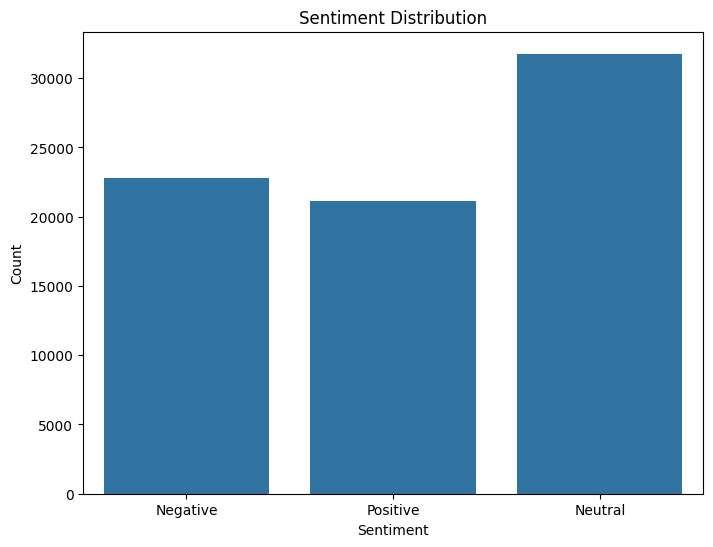

In [78]:
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Negative', 'Positive', 'Neutral'])
plt.savefig('sentiment_distribution.png')
plt.show()


In [79]:
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['target']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [82]:
y_pred = model.predict(X_test)

In [83]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.4f}")

Model accuracy: 0.6675


In [84]:
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']